# Ensemble Learning (Boosting)

A general weighted ensemble prediction using $K$ individual models can be written as

$$
f_{K}(\textbf{x})=\sum_{k=1}^K \alpha_k h_k(\textbf{x})
$$

where $h_k(\textbf{x})$ is the prediction for the $k^\text{th}$ model and $\alpha_k$ is the associated weight. The individual models can be trained independently in which if they are same type of models the ensemble learning type is called **bagging**, otherwise if different type of models (such as a decision tree and an SVM) are allowed then it is called **stacking**. However, instead of creating independent models, this can also be adjusted in a way that the predictive performance of the model $f_{K}(\textbf{x})$ is better than $f_{K-1}(\textbf{x})$ by a smart training of model $h_{K}(\textbf{x})$, in which case the ensemble type is called **boosting**, which refers to boosted performance of the current model on the previous ones. The challenge then becomes: how should we determine each $h_{k}(\textbf{x})$ so that it contributes meaningfully to this improvement?



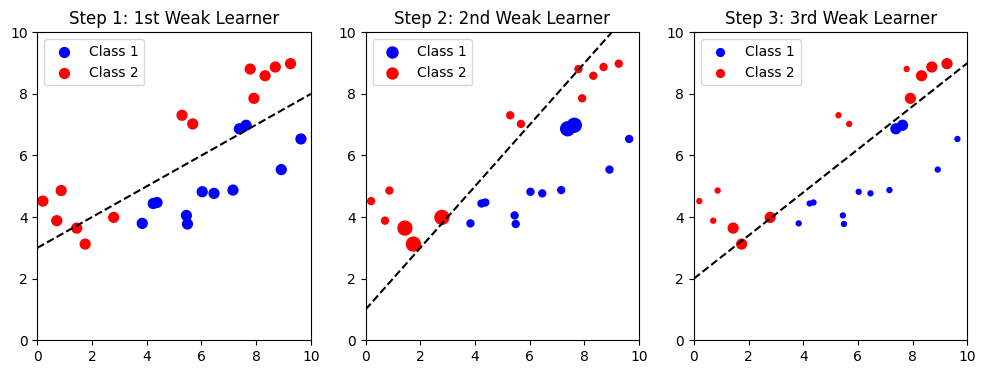

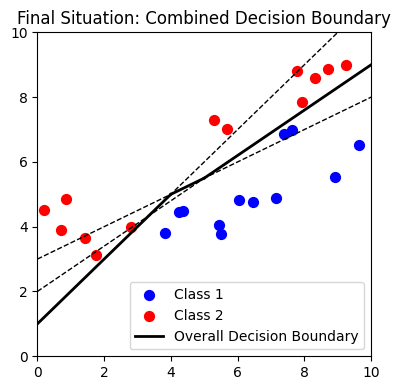

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
np.random.seed(0)

# Generate random x-coordinates within [0,10]
x_class_1 = np.random.uniform(0, 10, 10)
x_class_2 = np.random.uniform(0, 10, 10)

# Generate corresponding y-values ensuring they are to the left/right of the line
m1, b1 = 0.5, 3
y_class_1 = m1 * x_class_1 + b1 - np.random.uniform(0.5, 2.0, 10)  # Below the line (left side)
y_class_2 = m1 * x_class_2 + b1 + np.random.uniform(0.5, 2.0, 10)  # Above the line (right side)

# Ensure all points remain within the range [0,10] for y
y_class_1 = np.clip(y_class_1, 0, 10)
y_class_2 = np.clip(y_class_2, 0, 10)

class_1 = np.concatenate((x_class_1.reshape(-1,1), y_class_1.reshape(-1,1)), axis=1)
class_2 = np.concatenate((x_class_2.reshape(-1,1), y_class_2.reshape(-1,1)), axis=1)

x_class_2 = np.random.uniform(0, 4, 3)
m2, b2 = 1, 1
y_class_2 =  + np.random.uniform(m1 * x_class_2 + b1, m2 * x_class_2 + b2, 3)  # Below the line (left side)
class_2_add = np.concatenate((x_class_2.reshape(-1,1), y_class_2.reshape(-1,1)), axis=1)
class_2 = np.concatenate((class_2, class_2_add), axis=0)

x_class_2 = np.random.uniform(7, 10, 2)
m3, b3 = 0.7, 2
y_class_2 =  + np.random.uniform(m1 * x_class_2 + b1, m3 * x_class_2 + b3, 2)  # Below the line (left side)
class_1_add = np.concatenate((x_class_2.reshape(-1,1), y_class_2.reshape(-1,1)), axis=1)
class_1 = np.concatenate((class_1, class_1_add), axis=0)

def adjust_point_size(points, point_sizes, line_params, direction='>'):

    m, b = line_params
    for i, size in enumerate(point_sizes):
        x, y= points[i,:]
        if (direction=='>' and y > m*x + b) or (direction=='<' and y < m*x + b):
            point_sizes[i] = size*2
        else:
            point_sizes[i] = size/2

    return point_sizes

# Define decision boundaries for weak classifiers
x_vals = np.linspace(0,10,100)
point_sizes_class_1 = [50]*class_1.shape[0]
point_sizes_class_2 = [50]*class_2.shape[0]

# Plot boosting process in 4 stages
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Step 1: Initial classifier (equal weights)
ax1 = axes[0]
ax1.scatter(class_1[:, 0], class_1[:, 1], color='blue', s=point_sizes_class_1, label="Class 1")
ax1.scatter(class_2[:, 0], class_2[:, 1], color='red', s=point_sizes_class_2, label="Class 2")
ax1.plot(x_vals, m1*x_vals+b1, 'k--')
ax1.set_title("Step 1: 1st Weak Learner")
ax1.set_xlim([0,10])
ax1.set_ylim([0,10])
ax1.legend()

# Step 2: Adjust weights for misclassified points
ax2 = axes[1]
point_sizes_class_1=adjust_point_size(class_1, point_sizes_class_1, [m1,b1], direction='>')
point_sizes_class_2=adjust_point_size(class_2, point_sizes_class_2, [m1,b1], direction='<')
ax2.scatter(class_1[:, 0], class_1[:, 1], color='blue', s=point_sizes_class_1, label="Class 1")
ax2.scatter(class_2[:, 0], class_2[:, 1], color='red', s=point_sizes_class_2, label="Class 2")
ax2.plot(x_vals, m2*x_vals+b2, 'k--')
ax2.set_title("Step 2: 2nd Weak Learner")
ax2.set_xlim([0,10])
ax2.set_ylim([0,10])
ax2.legend()

# Step 3: Further adjust weights for remaining misclassified points
ax3 = axes[2]
point_sizes_class_1=adjust_point_size(class_1, point_sizes_class_1, [m2,b2], direction='>')
point_sizes_class_2=adjust_point_size(class_2, point_sizes_class_2, [m2,b2], direction='<')
ax3.scatter(class_1[:, 0], class_1[:, 1], color='blue', s=point_sizes_class_1, label="Class 1")
ax3.scatter(class_2[:, 0], class_2[:, 1], color='red', s=point_sizes_class_2, label="Class 2")
ax3.plot(x_vals, m3*x_vals+b3, 'k--')
ax3.set_title("Step 3: 3rd Weak Learner")
ax3.set_xlim([0,10])
ax3.set_ylim([0,10])
ax3.legend()

fig = plt.figure(figsize=(4,4))
ax4 = fig.gca()
# Step 4: Final classifier with improved decision boundary
plt.scatter(class_1[:, 0], class_1[:, 1], color='blue', s=50, label="Class 1")
plt.scatter(class_2[:, 0], class_2[:, 1], color='red', s=50, label="Class 2")
ax4.plot(x_vals, m1*x_vals+b1, 'k--', linewidth=1)
ax4.plot(x_vals, m2*x_vals+b2, 'k--', linewidth=1)
ax4.plot(x_vals, m3*x_vals+b3, 'k--', linewidth=1)


x_=np.linspace(0,4,100)
ax4.plot(x_, m2*x_+b2, 'k-', linewidth=2, label="Overall Decision Boundary")
x_=np.linspace(4,5,100)
ax4.plot(x_, m1*x_+b1, 'k-', linewidth=2)
x_=np.linspace(5,10,100)
ax4.plot(x_, m3*x_+b3, 'k-', linewidth=2)

plt.title("Final Situation: Combined Decision Boundary")
plt.xlim([0,10])
plt.ylim([0,10])
plt.legend()

plt.tight_layout()
plt.show()

How the boosting algorithms work can be understood from the above artificial example. In this example, we have 2 classes depicted with 2 different colors and at each plot, the sizes of the samples are either decreased or increased according to their weights to create a new decision boundary. In the beginning, all samples have equal weights since there is no information to assign separate weights at this point. With this equal contribution, we can draw a line that can separate most of the points correctly but we are particularly interested in those points that are misclassified.

In Step 2, 5 points that were drawn larger can be observed. These were the incorrectly classified points in the previous step. Also note that the size of the other points are decreased since assuming total contribution should add up to 1, increasing weights of certain points automatically decreases the others. This shifts the decision line in a way that it is tilted in counterclockwise direction. With these adjustments, these points are correctly classified this time. However, another cluster of points to the upper right of the diagram that belong to class 2 are this time wrongly classified. We can go for one more iteration to see that almost all points are correctly classified. The final decision boundary will be a piecewise linear one that individual classifiers created in different steps contribute altogether. Hence, the final step involves a decision region such that all the points of this set can be correctly classified.

This toy example gives the general essence of the boosting logic, where each classifier uses some previous information from the previous one so that new classifier has the potential to perform better. This kind of explicitly weighing the training points based on their incorrect classifications is not common to all boosting algorithms but special ones like Adaboost that will be discussed in the next section works like that. However, almost all boosting methods relies on decreasing some error metric from the previous iteration. The general logic of the boosting and certain realizations will be discussed in the latter sections but this example gives the principle idea of how to visualize it.

## How to Guarantee Performance Increase?

In the following parts, the condition to guarantee the improved performance will be derived. For the sake of simplicity, the input $\mathbf{x}$ will be dropped from the notation during the derivation but keep in mind that it is there.

The problem at hand to ensure increased performance is the following minimization problem

$$
\min_{h_{K}} L(f_{K}) = \min_{h_{K}} L(f_{K-1}+\alpha_{K} h_{K})
$$

where $L(.)$ is the loss function we want to optimize our model with. Note that normally the loss also has to include ground truth label $y_i$'s but they are also further dropped because they are irrelevant for the following derivation. Since the exact solution of the above minimization may not be feasible or simple, instead the following condition can be satisfied;

$$
L(f_{K-1}+\alpha_{K} h_{K}) < L(f_{K-1})
$$

which basically states the average loss in iteration $K$ must be less than the loss in iteration $K-1$. Assuming a small enough value of $\alpha_{K}$, the term in the left hand side of the inequality can be approximated by taking first two terms of its Taylor series expansion as;

$$
L(f_{K-1}+\alpha_{K} h_{K}) \cong L(f_{K-1}) + \alpha_{K} h_{K} \cdot \nabla L(f_{K-1})
$$

Thus, the difference between the two losses is a scaled version of the dot product $h_{K} \cdot \nabla L(f_{K-1})$ which is the projection of predictions of new learner $h_{K}$ onto the gradient of the loss of previous ensemble model. In order to satisfy the inequality, we need  $h_{K} \cdot \nabla L(f_{K-1})<0$.

At this point, let's put the input $\mathbf{x}$ again and rewrite the last condition with a summation notation as

$$
\sum_{i=1}^n \frac{\partial L(f_{K-1}(\mathbf{x}_i))}{\partial f_{K-1}(\mathbf{x}_i)} h_{K}(\mathbf{x}_i) <0
$$

Here, let's call the derivative term $r(\mathbf{x}_i)$,

$$
r(\mathbf{x}_i) = \frac{\partial L(f_{K-1}(\mathbf{x}_i))}{\partial f_{K-1}(\mathbf{x}_i)}
$$

which is the **residual** (or **gradient** that will give the name to "gradient boosting" algorithms) and will make the backbone of all the boosting algorithms that will be discussed. Hence, the condition can be finally rewritten as;

$$
\sum_{i=1}^n r(\mathbf{x}_i) h_{K}(\mathbf{x}_i) <0
$$

As long a this condition is satisfied, the boosting algorithm is guaranteed to perform better with each iteration on the training set.

## Adaboost

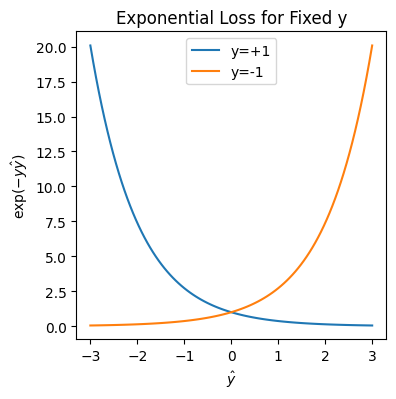

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

y_prime=np.linspace(-3,3,100)

plt.figure(figsize=(4,4))

y=1
loss=np.exp(-y*y_prime)
plt.plot(y_prime, loss, label='y=+1')

y=-1
loss=np.exp(-y*y_prime)
plt.plot(y_prime, loss, label='y=-1')

plt.title(f"Exponential Loss for Fixed y")
plt.xlabel(r'$\hat{y}$')
plt.ylabel(r'$\exp({-y \hat{y}})$')
plt.legend()
plt.show()

Adaboost (**ada**ptive **boost**) is an ensemble classifier technique (there are regressor variants, as well but they are modifications to original algorithm) that uses **exponential loss** (as plotted above) for optimization. If we go back to the original notation of ensembles, with a little modification, prediction is done as;

$$
\overline{f}_{K}(\textbf{x})= \text{sgn} \left(\sum_{k=1}^K  \alpha_k h_k(\textbf{x}) \right)
$$

Thus, the addition of the $\text{sign}$ function clearly demonstrates its classification property with the outputs $\overline{f}_{K} \in \{-1, +1\}$. From this point on $\overline{f}_{K}$ with a bar on top will depict the discrete output case and $f_{K}$ will depict the case without $\text{sign}$ function. Before going deeper into derivation parts, it should be emphasized that, typically not only the overall ensemble, but also the individual learners $h_k$ are classifiers in adaboost (this is important despite seeming trivial at first, but we will see ensemble classifiers with regressor learners in the gradient boosting case). Thus, they also output values $h_k \in \{-1, +1\}$ instead of continuous values.

Let's start derivation phase now. The loss used in optimization of adaboost is the exponential loss;

$$
l(y_i, \hat{y}_i)=\exp(-y_i \hat{y}_i)
$$

Hence, when ground truth labels and predictions are equal the loss value is $\text{e}^{-1}$ and when they are not equal it will be $\text{e}$. Thus, for the individual sample case, it can take only two values and our attempt will be on generating a model making this the lower $\text{e}^{-1}$ value most of the time.

For the ${k}^{\text{th}}$ iteration and multiple values, this loss can be computed as;

$$
L( \mathbf{y}, \mathbf{\hat{y}}) =  \sum_{i=1}^n \exp(-y_i \hat{y}_i) = \sum_{i=1}^n \exp(-y_i f_{k-1}(\mathbf{x}_i))
$$

The residual $r(\mathbf{x}_i)$ will be;

$$
r(\mathbf{x}_i) = \frac{\partial L(\mathbf{y}, \mathbf{\hat{y}})}{\partial f_{k-1}(\mathbf{x}_i)} = -y_i \exp(-y_i f_{k-1}(\mathbf{x}_i))
$$

At this point define;

$$
w_{i,k-1} \triangleq  \frac{1}{Z}\exp(-y_i f_{k-1}(\mathbf{x}_i)), \quad \text{where } Z=\sum_{i=1}^n\exp(-y_i f_{k-1}(\mathbf{x}_i)) \quad ⇒ \quad \sum_{i=1}^n w_{i,k-1} =1
$$

These $w_{i,k-1}$ will be used to weigh the training samples $\mathbf{x}_i$ to train the new classifier $h_{k}$. When the label and prediction associated with a sample differ (i.e. misclassified), it will have a higher weight and this will help the decision boundary to be shifted in favor of correct classification of this sample which is desired. Substituting these into the residual expression;

$$
r(\mathbf{x}_i) =  -y_i \underbrace{\exp(-y_i f_{k-1}(\mathbf{x}_i))}_{Z w_{i,k-1}} = -Z  w_{i,k-1} y_i
$$

Now let's go back to the condition to satisfy the model improvement. Assuming we trained a new classifier $h_{k}$ using the weights $w_{i,k-1}$;

\begin{align}
\sum_{i=1}^n r(\mathbf{x}_i) h_{k}(\mathbf{x}_i) &= -Z \sum_{i=1}^n w_{i,k-1} y_i  h_{k}(\mathbf{x}_i) = -Z \left[ \underbrace{\sum_{h_{k}(\mathbf{x}_i)=y_i} w_{i,k-1}}_{1-\sum_{h_{k}(\mathbf{x}_i) \neq y_i} w_{i,k-1}} - \sum_{h_{k}(\mathbf{x}_i) \neq y_i} w_{i,k-1}  \right] \\
&= Z \left[ 2\sum_{h_{k}(\mathbf{x}_i) \neq y_i} w_{i,k-1} - 1 \right] <0 \quad ⇒ \quad \epsilon_{k} \triangleq \sum_{h_{k}(\mathbf{x}_i) \neq y_i} w_{i,k-1} = \frac{1}{Z} \sum_{h_{k}(\mathbf{x}_i) \neq y_i} \exp(-y_i f_{k-1}(\mathbf{x}_i)) < 0.5
\end{align}

Hence, the improvement is guaranteed if the above $\epsilon_{k}$ parameter is ensured to be less than $0.5$. This $\epsilon_{k}$ term can be called an error term, because it is the normalized total exponential loss of misclassified samples.

After finding the condition for improvement, the next step is finding the optimal learner weight $\alpha_{k}$, optimizing the following problem;

$$
\min_{\alpha_{k}} L(f_{k-1}+\alpha_{k} h_{k})
$$

This can be found by differentiating w.r.t. $\alpha_{k}$ but first let's expand the loss expression.

\begin{align}
L(f_{k-1}+\alpha_{k} h_{k}) &= \sum_{i=1}^n \exp \left(-y_i \left[ f_{k-1}(\mathbf{x}_i)+\alpha_{k} h_{k}(\mathbf{x}_i) \right] \right)
= \sum_{i=1}^n \underbrace{\exp \left(-y_i f_{k-1}(\mathbf{x}_i)\right)}_{Z w_{i,k-1}} \exp \left(-\alpha_{k} y_i h_{k}(\mathbf{x}_i)  \right) \\
&= Z \left[ \exp \left(-\alpha_{k} \right) \underbrace{\sum_{h_{k}(\mathbf{x}_i)=y_i}  w_{i,k-1}}_{1-\epsilon_{k}}  + \exp \left(\alpha_{k}  \right) \underbrace{\sum_{h_{k}(\mathbf{x}_i) \neq y_i}  w_{i,k-1}}_{\epsilon_{k}} \right]
= Z \left[ \left(1-\epsilon_{k} \right) \exp \left(-\alpha_{k} \right)  + \epsilon_{k}  \exp \left(\alpha_{k}  \right)  \right]\\
\end{align}


Now differentiating w.r.t. $\alpha_{k}$;

$$
Z \left[ -\left(1-\epsilon_{k} \right) \exp \left(-\alpha_{k} \right)  + \epsilon_{k}  \exp \left(\alpha_{k}  \right)  \right]=0 \quad ⇒ \quad \alpha_{k} = \frac{1}{2} \log \left(\frac{1-\epsilon_{k}}{\epsilon_{k}} \right)
$$


As a last step, calculate the new sample weights as

$$
w_{i,k} = \frac{1}{2\sqrt{\epsilon_{k} (1-\epsilon_{k})}} \cdot w_{i,k-1} \exp(- \alpha_{k} y_i h_{k}(\mathbf{x}_i))
$$

Here the term $1/(2\sqrt{\epsilon_{k} (1-\epsilon_{k})})$ acts as a normalization to make the weights sum up to $1$, the crucial part is the exponential term that will increase the influence of sample $\mathbf{x}_i$ if it is incorrectly classified with learner $h_{k}$.

Dataset $\{(\textbf{x}_i, y_i)\}_{i=1}^{n}$, number of weak learners $K$.

* Initialize sample weights uniformly:
  $$w_{i,0}=\frac{1}{n}, \quad i = 1, 2, \dots, n$$
* For $k = 1$ to $K$:
  1. Fit a classifier $h_{k}$ by weighing samples with weights $w_{i,k-1}$ from previous iteration.
  2. Calculate the misclassification $\epsilon_{k}$:
  $$
  \epsilon_{k} = \sum_{h_{k}(\mathbf{x}_i) \neq y_i} w_{i,k-1}
  $$
  3. Calculate the learner weight $\alpha_k$:
  $$
  \alpha_k = \frac{1}{2} \log \left(\frac{1-\epsilon_{k}}{\epsilon_{k}} \right)
  $$
  4. Update the sample weights $w_{i,k-1}$ in normalized form as $w_{i,k}$:
  $$
  w_{i,k} = \frac{1}{2\sqrt{\epsilon_{k} (1-\epsilon_{k})}} \cdot w_{i,k-1} \exp(- \alpha_{k} y_i h_{k}(\mathbf{x}_i))
  =
  \begin{cases}
    \frac{1}{2(1-\epsilon_{k})} \cdot w_{i,k-1}, & y_i = h_{k}(\mathbf{x}_i) \\
    \frac{1}{2\epsilon_{k}} \cdot w_{i,k-1}, & y_i \neq h_{k}(\mathbf{x}_i)
  \end{cases}
  $$
* Output $\overline{f}_{K}(\textbf{x})= \text{sgn} \left(\sum_{k=1}^K  \alpha_k h_k(\textbf{x}) \right)$.

Below is an implementation of the Adaboost algorithm defined. Although any kind of weak classifier can be used as a learner (e.g. k-NN classifier, a shallow neural network), this algorithm is generally associated with decision stumps which are decision trees with exactly 1 split. This means the tree is thresholding only 1 single feature, and a collection of those is used in Adaboost. In the below implementation, any weak learner can be inputted by the user but the default setting is the stumps.

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from copy import deepcopy

class AdaBoostClassifier:
    def __init__(self, n_estimators=50, weak_learner=None):
        self.n_estimators = n_estimators
        self.weak_learner = weak_learner if weak_learner else DecisionTreeClassifier(max_depth=1)
        self.learner_info = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Initialize weights equally
        w = np.ones(n_samples) / n_samples

        for _ in range(self.n_estimators):
            # Train weak classifier
            learner = self._clone_learner()
            learner.fit(X, y, sample_weight=w)
            y_pred = learner.predict(X)

            # Compute classification error
            epsilon = np.sum(w * (y_pred != y))

            # Compute learner weight alpha
            if epsilon > 0.5:
                continue  # Skip this weak learner if it's worse than random guessing
            else:
                alpha = 0.5 * np.log((1 - epsilon) / (epsilon + 1e-10))  # Compute alpha

            # Update the sample weights
            w *= np.exp(-alpha * y * y_pred)/(2*np.sqrt(epsilon*(1-epsilon)))

            # Save the learner and its weight
            self.learner_info.append((alpha, deepcopy(learner)))

    def predict(self, X):
        # Sum weak learners' predictions weighted by alpha
        pred = np.sum(alpha * learner.predict(X) for alpha, learner in self.learner_info)
        return np.sign(pred)  # Convert to {-1, 1} class labels

    def _clone_learner(self):
        """Clones the weak learner template."""
        return self.weak_learner


<ipython-input-1-52e7c1817083>:39: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  pred = np.sum(alpha * learner.predict(X) for alpha, learner in self.learner_info)


Test Accuracy: 0.89


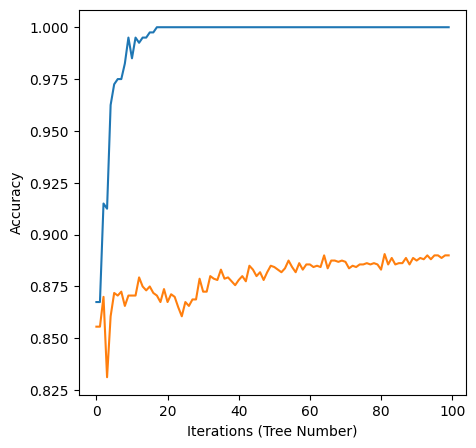

In [4]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

# Generate a toy dataset
X, y = make_classification(n_samples=2000, n_features=10, n_informative=5, n_redundant=0, random_state=0)
y = np.where(y == 0, -1, 1)  # Convert labels to {-1, 1} for Adaboost

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

# Train AdaBoost classifier
# model = AdaBoostClassifier(n_estimators=250)
model = AdaBoostClassifier(n_estimators=100, weak_learner=DecisionTreeClassifier(max_depth=3))
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.2f}")

pred_test=np.zeros(X_test.shape[0])
acc_test = []
pred_train=np.zeros(X_train.shape[0])
acc_train = []
for alpha, learner in model.learner_info:

    pred_train += alpha * learner.predict(X_train)
    acc_train.append(np.mean(np.sign(pred_train)==y_train))

    pred_test += alpha * learner.predict(X_test)
    acc_test.append(np.mean(np.sign(pred_test)==y_test))

plt.figure(figsize=(5,5))
plt.plot(acc_train, label='Training Accuracy')
plt.plot(acc_test, label='Test Accuracy')
# plt.ylim([-0.1,1.1])
plt.xlabel('Iterations (Tree Number)')
plt.ylabel('Accuracy')
plt.show()

<!-- Exponential loss for the ${k^\prime}^{\text{th}}$ iteration.
$$
L(\mathbf{X}, \mathbf{y}) = \sum_{i=1}^n \exp(-y_i f_{k^\prime}(\mathbf{x}_i))
$$

$$
r(\mathbf{x}_i) = \frac{\partial L(\mathbf{X}, \mathbf{y})}{\partial f_{k^\prime}(\mathbf{x}_i)} = -y_i \exp(-y_i f_{k^\prime}(\mathbf{x}_i)) \\
w_i=\frac{1}{Z}\exp(-y_i f_{k^\prime}(\mathbf{x}_i)), \quad \text{where } Z=\sum_{i=1}^n\exp(-y_i f_{k^\prime}(\mathbf{x}_i))
\quad ⇒ \quad r(\mathbf{x}_i)=-y_i w_i Z, \quad \sum_{i=1}^n w_i =1
$$

\begin{align}
\sum_{i=1}^n r(\mathbf{x}_i) h_{k^\prime}(\mathbf{x}_i) &= -Z \sum_{i=1}^n y_i w_i h_{k^\prime}(\mathbf{x}_i) = -Z \left[ \underbrace{\sum_{h_{k^\prime}(\mathbf{x}_i)=y_i}^n w_i}_{1-\sum_{h_{k^\prime}(\mathbf{x}_i) \neq y_i}^n w_i} - \sum_{h_{k^\prime}(\mathbf{x}_i) \neq y_i}^n w_i  \right] \\
&= Z \left[ 2\sum_{h_{k^\prime}(\mathbf{x}_i) \neq y_i}^n w_i - 1 \right] <0 \quad ⇒ \quad \epsilon=\sum_{h_{k^\prime}(\mathbf{x}_i) \neq y_i} w_i < 0.5
\end{align}

Thus, if total error $\epsilon$ is slightly less than $50\%$ (i.e. slightly better than random chance), then the improvement is guaranteed in boosting.

After the learner $h_{k^\prime+1}$ is found, the next step is finding the optimal weight $\alpha_{k^\prime+1}$, optimizing the following problem;

$$
\min_{\alpha_{k^\prime+1}} L(f_{k^\prime}+\alpha_{k^\prime+1} h_{k^\prime+1})
$$

This can be found by differentiating w.r.t. $\alpha_{k^\prime+1}$ but first let's expand the loss expression.

\begin{align}
L(f_{k^\prime}+\alpha_{k^\prime+1} h_{k^\prime+1}) &= \sum_{i=1}^n \exp \left(-y_i \left[ f_{k^\prime}(\mathbf{x}_i)+\alpha_{k^\prime+1} h_{k^\prime+1}(\mathbf{x}_i) \right] \right)
= \sum_{i=1}^n \underbrace{\exp \left(-y_i f_{k^\prime}(\mathbf{x}_i)\right)}_{Z w_i} \exp \left(-\alpha_{k^\prime+1} y_i h_{k^\prime+1}(\mathbf{x}_i)  \right) \\
&= Z \left[ \exp \left(-\alpha_{k^\prime+1} \right) \underbrace{\sum_{h_{k^\prime+1}(\mathbf{x}_i)=y_i}  w_i}_{1-\epsilon}  + \exp \left(\alpha_{k^\prime+1}  \right) \underbrace{\sum_{h_{k^\prime+1}(\mathbf{x}_i) \neq y_i}  w_i}_{\epsilon} \right]\\
&= Z \left[ \left(1-\epsilon \right) \exp \left(-\alpha_{k^\prime+1} \right)  + \epsilon  \exp \left(\alpha_{k^\prime+1}  \right)  \right]\\
\end{align}

<!-- \begin{align}
L(f_{k^\prime}+\alpha_{k^\prime+1} h_{k^\prime+1}) &= \sum_{i=1}^n \exp \left(-y_i \left[ f_{k^\prime}(\mathbf{x}_i)+\alpha_{k^\prime+1} h_{k^\prime+1}(\mathbf{x}_i) \right] \right)
= \sum_{i=1}^n \underbrace{\exp \left(-y_i f_{k^\prime}(\mathbf{x}_i)\right)}_{Z w_i} \exp \left(-\alpha_{k^\prime+1} y_i h_{k^\prime+1}(\mathbf{x}_i)  \right) \\
&= Z \left[ \sum_{h_{k^\prime+1}(\mathbf{x}_i)=y_i}  w_i \exp \left(-\alpha_{k^\prime+1} \right) + \sum_{h_{k^\prime+1}(\mathbf{x}_i) \neq y_i}  w_i \exp \left(\alpha_{k^\prime+1}  \right)\right]\\
&= Z \left[ \exp \left(-\alpha_{k^\prime+1} \right) \underbrace{\sum_{h_{k^\prime+1}(\mathbf{x}_i)=y_i}  w_i}_{1-\epsilon}  + \exp \left(\alpha_{k^\prime+1}  \right) \underbrace{\sum_{h_{k^\prime+1}(\mathbf{x}_i) \neq y_i}  w_i}_{\epsilon} \right]\\
&= Z \left[ \left(1-\epsilon \right) \exp \left(-\alpha_{k^\prime+1} \right)  + \epsilon  \exp \left(\alpha_{k^\prime+1}  \right)  \right]\\
\end{align} -->
<!--
Now differentiating w.r.t. $\alpha_{k^\prime+1}$;

$$
Z \left[ -\left(1-\epsilon \right) \exp \left(-\alpha_{k^\prime+1} \right)  + \epsilon  \exp \left(\alpha_{k^\prime+1}  \right)  \right]=0 \quad ⇒ \quad \alpha_{k^\prime+1} = \frac{1}{2} \log \left(\frac{1-\epsilon}{\epsilon} \right)
$$ -->

## Gradient Boosting

Dataset $\{(\textbf{x}_i, y_i)\}_{i=1}^{n}$, a differentiable loss function $L(y, F(\textbf{x}))$, number of weak learners $K$ and a learning rate $\mu$.

* Initialize model with a constant value:
  $$F_0(\textbf{x}) = \arg\min_{\gamma} \sum_{i=1}^{n} L(y_i, \gamma)$$
* For $k = 1$ to $K$:
  1. Compute **residuals**:
$$
r_{ik} = -\frac{\partial L(y_i, F_{k-1}(\textbf{x}_i))}{\partial F_{k-1}(\textbf{x}_i)}, \quad i = 1, 2, \dots, n
$$
  2. Fit a weak learner (mostly a decision tree) closed under scaling $h_k$ to residuals $r_{ik}$ for $i = 1, 2, \dots, n$.
  3. Calculate multiplier $\gamma_k$ as;
$$
\gamma_k = \arg\min_{\gamma} \sum_{i=1}^{n} L(y_i, F_{k-1}(\textbf{x}_i) + \gamma h_k(\textbf{x}_i))
$$
  4. Update the model:
  $$F_k(\textbf{x}) = F_{k-1}(\textbf{x}) + \mu \gamma_k h_k(\textbf{x})$$
* Output $F_K(\textbf{x})$.


After the training, the model parameters will be $F_0$ (assume this is the one obtained from the training set, and a constant now so drop the parantheses), the multipliers $\gamma_k$, the weak learners $h_k$ and learning rate $\mu$. There can be additional parameters coming from $h_k$ depending on the learner type. In the case of decision trees, the learners are non-parametric.



For the prediction of arbitrary $\textbf{x}$, the formula is;
$$
f(\textbf{x})=F_0 + \mu \sum_{k=1}^{K} \gamma_k h_k(\textbf{x})
$$


This is the general essence of any gradient boosting algorithm. Certain modifications can be applied in different implementations. One example, as we will see in the case of gradient boosting with decision trees, $\gamma_m$ will not be a single value for the whole tree but instead there will be different $\gamma_{jm}$ values for each leaf of the tree, the index $j$ depicting the leaf number.

The main difference of the gradient boosting compared to other algorithms is that instead of making the model fitting to output labels $y_i$, the residuals (i.e. gradients) will be used as learner outputs. Each learner will output these residuals as the deviatons from the average value $F_0$ and these deviations will be incrementally added on top of that average weighted by learning rate $\mu$ which is constant for the whole ensemble and $\gamma_m$ which has a different value for each indivdual model $h_m$ (and in the case of trees a different value for each leaf of each tree). Note the "closed under scaling" phrase in step 2, which means $h_m$ must still be a valid predictor even after scaling otherwise this weighted addition will be less useful. With this structure of error addition on top of a constant the gradient boosting is bound to having an ensemble structure because single model will most likely give bad residual predictions to the unseen data.

### Gradient Boosting with Decision Trees

Decision trees with limited depths are the most common weak learners used with gradient boosting, thus they deserve a particular section here. Remember in the general gradient boosting, we mentioned the learners must be "closed under scaling" which means if $h_k$ is the learner used then $a h_k$ for any scalar $a \neq 0$ must also be valid. This necessitates linearity of the learner which decision trees are normally not. However, since the fitted outputs are the residuals in gradient boosting decision trees obey this property for this particular case. This also means usage of 'regression trees' as individual learners even if the overall problem is a classification one because residuals are continuous values and not discrete classes.

There is also an important difference when decision trees are used as the weak learners compared to general case. In the general case for each learner $h_k$, there is a single $\gamma_k$ value associated with it. In the case of trees, each leaf of tree is called a **terminal region** $R_{jk}$ where $j$ is the index of a particular leaf in the tree $h_k$ (the number of leaves can be different for each $h_k$). Each of these terminal regions have a different multiplier $\gamma_{jk}$ giving more flexibility to overall ensemble model. The initialization part of the algorithm and first two steps in the loop remains same but the last steps of the loop are modified as;

* For $k = 1$ to $K$:
  $$ \vdots $$
  3. For $j=1,2 \dots n_{\text{leaf}}$, calculate multiplier $\gamma_{jk}$ as;

  $$
  \gamma_{jk} = \arg\min_{\gamma} \sum_{\textbf{x}_i \in R_{jk}} L(y_i, F_{k-1}(\textbf{x}_i) + \gamma)
  $$
  4. Update the model:
   $$
  F_{k}(\textbf{x})=F_{k-1}(\textbf{x}) + \mu \sum_{j=1}^{n_{\text{leaf}}} \gamma_{jk} I(\textbf{x} \in R_{jk})
  $$

Thus, instead of having a single $\gamma_k$ value for the given tree, there are $n_{\text{leaf}}$ number of $\gamma_{jk}$'s one associated with a particular leaf. The sum coupled with the indicator function $I(\cdots)$ is just a natural extension of having a vector coefficent of $\gamma_{jk}$ instead of a scalar $\gamma_{k}$.



### Gradient Boosting Implementation

Below is given an implementation of the 'gradient boosting' algorithm for both regression and classification cases using decision trees. Certain details implemented here (mostly parts related to specific loss function used) are explained in the following sections but the most of it is already covered up to this point.

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from copy import deepcopy

class GradientBoosting:
    def __init__(self, mode="classifier", n_estimators=50, mu=0.1, max_depth=3):
        assert mode in ["classifier", "regressor"], "Mode must be either 'classifier' or 'regressor'."
        self.mode = mode
        self.n_estimators = n_estimators
        self.mu = mu
        self.max_depth = max_depth
        self.base_models = []
        self.gammas = []
        self.F0 = None  # Initial model prediction

    def _compute_initial_prediction(self, y):
        """Compute F0: mean for regression, and classification."""
        return np.mean(y)

    def _compute_residuals(self, y, F):
        """Compute residuals based on mode."""
        if self.mode == "regressor":
            return y - F  # MSE Gradient
        else:
            return (y - F) / (F * (1 - F))  # Log-loss Gradient

    def fit(self, X, y):
        """Train the gradient boosting model."""
        self.F0 = self._compute_initial_prediction(y)
        F = np.ones(len(y)) * self.F0  # Initialize predictions

        for _ in range(self.n_estimators):
            r_m = self._compute_residuals(y, F)
            model = DecisionTreeRegressor(max_depth=self.max_depth)
            model.fit(X, r_m)
            self.base_models.append(deepcopy(model))

            # Get leaf assignments
            leaf_indices = model.apply(X)
            unique_leaves = np.unique(leaf_indices)
            leaves_samples = {leaf: np.where(leaf_indices == leaf)[0] for leaf in unique_leaves}

            # Compute gamma updates per leaf
            gammas = np.array([np.mean(y[leaves_samples[l]] - F[leaves_samples[l]]) for l in unique_leaves])
            self.gammas.append(gammas)

            # Update predictions
            F += self.mu * gammas[np.array([np.where(unique_leaves == idx)[0][0] for idx in leaf_indices])]

    def predict(self, X):
        """Make predictions for new data."""
        F = np.ones(X.shape[0]) * self.F0
        for model, gammas in zip(self.base_models, self.gammas):
            leaf_indices = model.apply(X)
            unique_leaves = np.unique(leaf_indices)
            leaves_samples = {leaf: np.where(leaf_indices == leaf)[0] for leaf in unique_leaves}

            F += self.mu * gammas[np.array([np.where(unique_leaves == idx)[0][0] for idx in leaf_indices])]

        if self.mode == "classifier":
            return (F > 0.5).astype(int)  # Convert log-odds to binary output
        return F  # Regression: Return continuous values

### Regression Example

In the above sections where the gradient boosting is introduced the algorithms may seem a little complex becuase they were given as general as possible without giving a particular loss function. With the introduction of the relevant loss function, the minimization problems and the residual expressions given as derivatives can be simplified to closed form formulas. We will have the decision tree case here because they are the most used learner type.

For the regression case, the typical loss function used is mean square error;

$$
L(y_i, \hat{y}_i) = (y_i-\hat{y}_i)^2
$$

The initialization value $F_0$ will be

$$
F_0(\textbf{x}) = \arg\min_{\gamma} \sum_{i=1}^{n} (y_i- \gamma)^2 \quad
⇒ \quad \frac{\partial}{\partial \gamma}\left(\sum_{i=1}^{n} (y_i- \gamma)^2 \right)
= -2 \sum_{i=1}^{n} (y_i- \gamma) = 0 \quad ⇒ \quad F_0(\textbf{x}) = \frac{1}{n} \sum_{i=1}^{n} y_i
$$

The residuals wiil be;

$$
r_{ik} = -\frac{\partial }{\partial F_{k-1}(\textbf{x}_i)} \left(y_i-F_{k-1}(\textbf{x}_i) \right)^2 = 2 \left(y_i-F_{k-1}(\textbf{x}_i) \right), \quad i = 1, 2, \dots, n
$$

And the multipliers $\gamma_{jk}$ will be;

 $$
\gamma_{jk} = \arg\min_{\gamma} \sum_{\textbf{x}_i \in R_{jk}} (y_i-F_{k-1}(\textbf{x}_i) - \gamma)^2 \quad \\
⇒ \quad \frac{\partial}{\partial \gamma} \left(\sum_{\textbf{x}_i \in R_{jk}} (y_i-F_{k-1}(\textbf{x}_i) - \gamma)^2 \right)
= -2  \sum_{\textbf{x}_i \in R_{jk}} (y_i-F_{k-1}(\textbf{x}_i) - \gamma) = 0 \quad ⇒ \quad \gamma_{jk} = \frac{1}{\lvert R_{jk} \rvert} \sum_{\textbf{x}_i \in R_{jk}} (y_i-F_{k-1}(\textbf{x}_i))
$$

We can rewrite the algorithm in light of these simplified formulas.

Dataset $\{(\textbf{x}_i, y_i)\}_{i=1}^{n}$, a differentiable loss function $(y-F(\textbf{x}))^2$, number of weak learners $K$ and a learning rate $\mu$.

* Initialize model with a constant value:
  $$F_0(\textbf{x}) = \frac{1}{n} \sum_{i=1}^{n} y_i$$
* For $k = 1$ to $K$:
  1. Compute **residuals**:
$$
r_{ik} = 2 \left(y_i-F_{k-1}(\textbf{x}_i) \right), \quad i = 1, 2, \dots, n
$$
  2. Fit a weak learner closed under scaling $h_k$ to residuals $r_{ik}$ for $i = 1, 2, \dots, n$.
  3. For $j=1,2 \dots n_{\text{leaf}}$, calculate multiplier $\gamma_{jk}$ as;

  $$
  \gamma_{jk} = \frac{1}{\lvert R_{jk} \rvert} \sum_{\textbf{x}_i \in R_{jk}} (y_i-F_{k-1}(\textbf{x}_i))
  $$
  4. Update the model:
   $$
  F_{k}(\textbf{x})=F_{k-1}(\textbf{x}) + \mu \sum_{j=1}^{n_{\text{leaf}}} \gamma_{jk} I(\textbf{x} \in R_{jk})
  $$
* Output $F_K(\textbf{x})$.

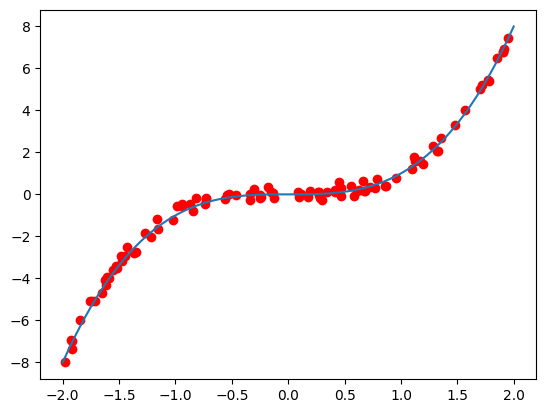

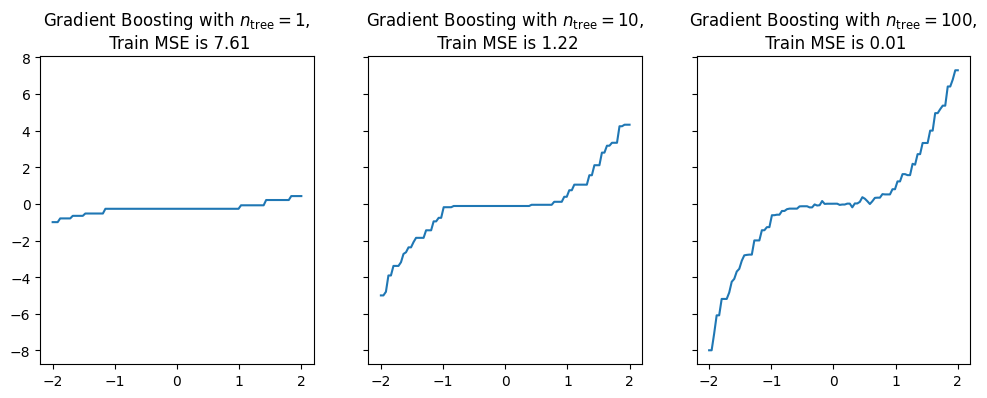

In [24]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

def func(x):
  return x**3

x_real=np.linspace(-2,2,100)
y_real=func(x_real)

X_train = np.sort(np.random.uniform(low=-2, high=2, size=100))
y_train = func(X_train) + 0.2*np.random.randn(100)

X_train=X_train.reshape(-1, 1)

plt.plot(x_real,y_real)
plt.scatter(X_train[:,0], y_train, color='r')
plt.show()


X_test = np.linspace(-2,2,100).reshape(-1, 1)
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)
for i, n_tree in enumerate([1,10,100]):
    model=GradientBoosting(mode="regressor", n_estimators=n_tree, mu=0.1, max_depth=3)
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    # print(f"Accuracy is {np.mean(pred==y_train)}")
    pred_y = model.predict(X_test)

    axes[i].plot(X_test, pred_y)
    # axes[i].set_xlabel('x1')
    # axes[i].set_ylabel('x2')
    axes[i].set_title(f"Gradient Boosting with $n_{{\\text{{tree}}}}={n_tree}$,\n Train MSE is {np.mean((pred_train-y_train)**2):.2f}")

plt.show()

### Classification Example

For the classification case, the typical loss function used is cross entropy loss;

$$
L(y_i, \hat{y}_i) = - \left( y_i \, \log(\hat{y}_i) + (1-y_i) \, \log(1-\hat{y}_i) \right)
$$

The initialization value $F_0$ will be

$$
F_0(\textbf{x}) = \arg\min_{\gamma} \left[ - \sum_{i=1}^{n} \left( y_i \, \log(\gamma) + (1-y_i) \, \log(1-\gamma) \right) \right] \quad \\
⇒ \quad -\frac{\partial}{\partial \gamma}\left(\sum_{i=1}^{n} \left( y_i \, \log(\gamma) + (1-y_i) \, \log(1-\gamma) \right) \right)
= - \sum_{i=1}^{n} \left( \frac{y_i}{\gamma} - \frac{1-y_i}{1-\gamma} \right) = 0 \quad \\
 ⇒ \quad \sum_{i=1}^{n} \left( y_i-\gamma \right) = 0 \quad ⇒ \quad F_0(\textbf{x}) = \frac{1}{n} \sum_{i=1}^{n} y_i
$$

The residuals wiil be;

$$
r_{ik} = -\frac{\partial }{\partial F_{k-1}(\textbf{x}_i)} \left[- \left( y_i \, \log(F_{k-1}(\textbf{x}_i)) + (1-y_i) \, \log(1-F_{k-1}(\textbf{x}_i)) \right) \right] \\
= \frac{y_i}{F_{k-1}(\textbf{x}_i)} - \frac{1-y_i}{1-F_{k-1}(\textbf{x}_i)}
= \frac{y_i-F_{k-1}(\textbf{x}_i)}{F_{k-1}(\textbf{x}_i)(1-F_{k-1}(\textbf{x}_i))}, \quad i = 1, 2, \dots, n
$$

And the multipliers $\gamma_{jk}$ will be;

 $$
\gamma_{jk} = \arg\min_{\gamma} \left[ - \sum_{\textbf{x}_i \in R_{jk}} \left( y_i \, \log(F_{k-1}(\textbf{x}_i) + \gamma) + (1-y_i) \, \log(1-F_{k-1}(\textbf{x}_i) - \gamma) \right) \right]  \quad \\
⇒ \quad - \frac{\partial}{\partial \gamma} \left(\sum_{\textbf{x}_i \in R_{jk}} \left( y_i \, \log(F_{k-1}(\textbf{x}_i) + \gamma) + (1-y_i) \, \log(1-F_{k-1}(\textbf{x}_i) - \gamma) \right) \right) \\
= -  \sum_{\textbf{x}_i \in R_{jk}} \left(\frac{y_i}{F_{k-1}(\textbf{x}_i) + \gamma} - \frac{1-y_i}{1-F_{k-1}(\textbf{x}_i) - \gamma} \right) = 0 \quad \\
⇒ \quad \sum_{\textbf{x}_i \in R_{jk}} \left(y_i - F_{k-1}(\textbf{x}_i) - \gamma \right) = 0 \quad ⇒ \quad \gamma_{jk} = \frac{1}{\lvert R_{jk} \rvert} \sum_{\textbf{x}_i \in R_{jk}} (y_i-F_{k-1}(\textbf{x}_i))
$$

We can rewrite the algorithm in light of these simplified formulas.

Dataset $\{(\textbf{x}_i, y_i)\}_{i=1}^{n}$, a differentiable loss function $- \left( y \, \log(F(\textbf{x})) + (1-y) \, \log(1-F(\textbf{x})) \right)$, number of weak learners $K$ and a learning rate $\mu$.

* Initialize model with a constant value:
  $$F_0(\textbf{x}) = \frac{1}{n} \sum_{i=1}^{n} y_i$$
* For $k = 1$ to $K$:
  1. Compute **residuals**:
$$
r_{ik} = \frac{y_i-F_{k-1}(\textbf{x}_i)}{F_{k-1}(\textbf{x}_i)(1-F_{k-1}(\textbf{x}_i))}, \quad i = 1, 2, \dots, n
$$
  2. Fit a weak learner closed under scaling $h_k$ to residuals $r_{ik}$ for $i = 1, 2, \dots, n$.
  3. For $j=1,2 \dots n_{\text{leaf}}$, calculate multiplier $\gamma_{jk}$ as;

  $$
  \gamma_{jk} = \frac{1}{\lvert R_{jk} \rvert} \sum_{\textbf{x}_i \in R_{jk}} (y_i-F_{k-1}(\textbf{x}_i))
  $$
  4. Update the model:
   $$
  F_{k}(\textbf{x})=F_{k-1}(\textbf{x}) + \mu \sum_{j=1}^{n_{\text{leaf}}} \gamma_{jk} I(\textbf{x} \in R_{jk})
  $$
* Output $F_K(\textbf{x})$.

Note that the forms of the simplified formulas are identical to the regression case for the initialization $F_0$ and optimal multipliers $\gamma_{jk}$, the difference is that $y_i$'s used here are class labels unlike continuous values as in the regression case.

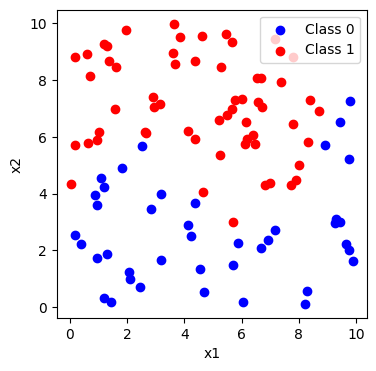

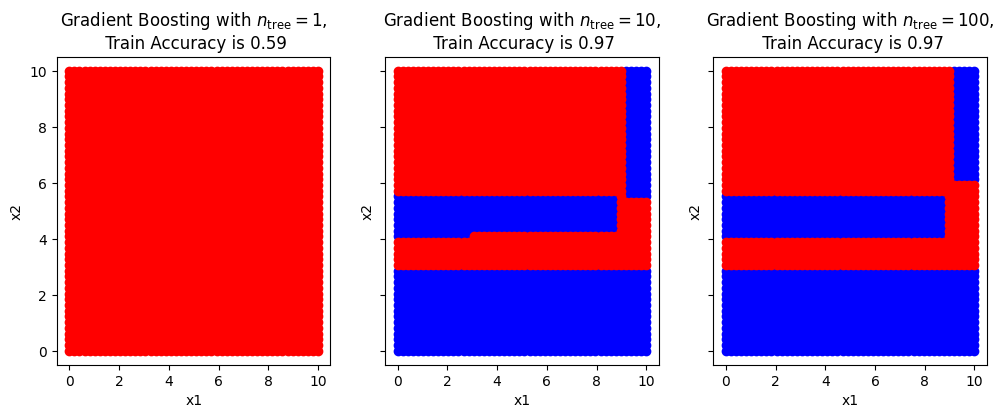

In [19]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# Create an artifical dataset where there are two lines making the separation for 2 classes
data_no = 100
X_train = np.concatenate((np.random.uniform(low=0.0, high=10.0, size=(data_no,1)), np.random.uniform(low=0.0, high=10.0, size=(data_no,1))), axis=1)
y_train = np.zeros(data_no)
# y_train[X_train[:,1]>-0.5*X_train[:,0]+5]=1
# y_train[X_train[:,1]>X_train[:,0]+5]=0

y_train[X_train[:,1]>0.1*X_train[:,0]**3-1.3*X_train[:,0]**2+4.3*X_train[:,0]+2]=1

# Scatter plot
plt.figure(figsize=(4, 4))
plt.scatter(X_train[y_train==0][:, 0], X_train[y_train==0][:, 1], color='blue', label='Class 0')
plt.scatter(X_train[y_train==1][:, 0], X_train[y_train==1][:, 1], color='red', label='Class 1')
plt.xlabel('x1')
plt.ylabel('x2')

plt.legend()
plt.show()


X_test_1, X_test_2 = np.meshgrid(np.linspace(0, 10, 50), np.linspace(0, 10, 50))
X_test = np.column_stack([X_test_1.ravel(), X_test_2.ravel()])

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)
for i, n_tree in enumerate([1,10,100]):
    model=GradientBoosting(mode="classifier", n_estimators=n_tree, mu=0.1, max_depth=3)
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    # print(f"Accuracy is {np.mean(pred==y_train)}")
    pred_y = model.predict(X_test)

    axes[i].scatter(X_test[pred_y==0][:, 0], X_test[pred_y==0][:, 1], color='blue', label='Class 0')
    axes[i].scatter(X_test[pred_y==1][:, 0], X_test[pred_y==1][:, 1], color='red', label='Class 1')
    axes[i].set_xlabel('x1')
    axes[i].set_ylabel('x2')
    # axes[i].set_title(f"Gradient Boosting with $n_t$={n_tree}")
    axes[i].set_title(f"Gradient Boosting with $n_{{\\text{{tree}}}}={n_tree}$,\n Train Accuracy is {np.mean(pred_train==y_train)}")

plt.show()